In [1]:
#In this workbook I: 
# --remove all ROIS which have a zero value
# --calculate column means (overall and per slice)
# --normalize columns within slices and set their mean to the overall column mean


import normalization as nrm
import pandas as pd


In [3]:
#import imaging data
roi_df = pd.read_csv("BM_AM_180808_190401.csv")
#roi_df=pd.read_csv("/Users/amanda/Desktop/mIHC_Analysis-master/BM_AM_180808_190312_Results.csv")
roi_df

,image,total cell index,ind cell index,Area,Circ.,AR,Round,Solidity,% depth,Tarpg3_mean,...,SCGN_median,Kv2.2_median,DAPI3_median,CAVIII_median,Rec_median,DAPI4_median,Calb_median,PKC_median,Parv_median,DAPI5_median
0,21_s1m1,0,0,0.049,0.857,1.450,0.690,0.897,5.259663,395.788,...,505,2338,1388,2062,3104,559,631,930,504,2476
1,21_s1m1,1,1,0.058,0.878,1.135,0.881,0.892,22.574779,453.132,...,1697,2525,2154,2047,2348,580,619,673,305,3681
2,21_s1m1,2,2,0.068,0.708,1.663,0.601,0.864,70.322646,565.603,...,352,2422,3321,1770,1447,796,674,701,250,6501
3,21_s1m1,3,3,0.067,0.763,1.336,0.749,0.863,54.642624,489.498,...,446,2413,2483,2195,3119,654,672,754,258,5217
4,21_s1m1,4,4,0.099,0.799,1.435,0.697,0.887,17.882495,555.135,...,391,2381,2049,2041,2497,580,649,846,393,3349
5,21_s1m1,5,5,0.060,0.828,1.496,0.669,0.884,43.863270,412.604,...,385,2334,2362,2072,3983,637,687,905,300,4595
6,21_s1m1,6,6,0.047,0.785,1.133,0.883,0.854,12.329750,674.315,...,439,2360,1711,2289,2944,587,767,1619,1376,2533
7,21_s1m1,7,7,0.080,0.496,1.602,0.624,0.833,45.541148,503.689,...,369,2334,2389,2076,2292,659,1297,1231,1081,4436
8,21_s1m1,8,8,0.091,0.592,1.395,0.717,0.838,21.534774,488.118,...,432,2328,1781,1737,2664,552,682,687,297,2800
9,21_s1m1,9,9,0.118,0.588,1.331,0.751,0.794,68.174310,632.461,...,381,2413,2832,1963,1578,801,674,697,256,5124


In [4]:
roi_df.columns.values.tolist()

['image ',
 'total cell index',
 'ind cell index',
 'Area',
 'Circ.',
 'AR',
 'Round',
 'Solidity',
 '% depth',
 'Tarpg3_mean',
 'Islet1_mean',
 'Pax6_mean',
 'DAPI_mean',
 'CD15_mean',
 'GLT-1_mean',
 'Cav3.1_mean',
 'DAPI2_mean',
 'CABP5_mean',
 'SSCGN_mean',
 'Kv2.2_mean',
 'DAPI3_mean',
 'CAVIII_mean',
 'Rec_mean',
 'DAPI4_mean',
 'Calb_mean',
 'PKC_mean',
 'Parv_mean',
 'DAPI5_mean',
 'Tarpg3_stddev',
 'Islet1_stddev',
 'Pax6_stddev',
 'DAPI_stddev',
 'CD15_stddev',
 'GLT-1_stddev',
 'Cav3.1_stddev',
 'DAPI2_stddev',
 'CABP5_stddev',
 'SCGN_stddev',
 'Kv2.2_stddev',
 'DAPI3_stddev',
 'CAVIII_stddev',
 'Rec_stddev',
 'DAPI4_stddev',
 'Calb_stddev',
 'PKC_stddev',
 'Parv_stddev',
 'DAPI5_stddev',
 'Tarpg3_median',
 'Islet1_median',
 'Pax6_median',
 'DAPI_median',
 'CD15_median',
 'GLT-1_median',
 'Cav3.1_median',
 'DAPI2_median',
 'CABP5_median',
 'SCGN_median',
 'Kv2.2_median',
 'DAPI3_median',
 'CAVIII_median',
 'Rec_median',
 'DAPI4_median',
 'Calb_median',
 'PKC_median',
 'Parv_

In [5]:
columnsAnalyze=['Tarpg3_mean',
 'Islet1_mean',
 'Pax6_mean',
 'DAPI_mean',
 'CD15_mean',
 'GLT-1_mean',
 'Cav3.1_mean',
 'DAPI2_mean',
 'CABP5_mean',
 'SSCGN_mean',
 'Kv2.2_mean',
 'DAPI3_mean',
 'CAVIII_mean',
 'Rec_mean',
 'DAPI4_mean',
 'Calb_mean',
 'PKC_mean',
 'Parv_mean',
 'DAPI5_mean',
 'Tarpg3_stddev',
 'Islet1_stddev',
 'Pax6_stddev',
 'DAPI_stddev',
 'CD15_stddev',
 'GLT-1_stddev',
 'Cav3.1_stddev',
 'DAPI2_stddev',
 'CABP5_stddev',
 'SCGN_stddev',
 'Kv2.2_stddev',
 'DAPI3_stddev',
 'CAVIII_stddev',
 'Rec_stddev',
 'DAPI4_stddev',
 'Calb_stddev',
 'PKC_stddev',
 'Parv_stddev',
 'DAPI5_stddev',
 'Tarpg3_median',
 'Islet1_median',
 'Pax6_median',
 'DAPI_median',
 'CD15_median',
 'GLT-1_median',
 'Cav3.1_median',
 'DAPI2_median',
 'CABP5_median',
 'SCGN_median',
 'Kv2.2_median',
 'DAPI3_median',
 'CAVIII_median',
 'Rec_median',
 'DAPI4_median',
 'Calb_median',
 'PKC_median',
 'Parv_median',
 'DAPI5_median']

#calculate mean intensities across slices
indMean_df=nrm.meanSTD(roi_df, columnsAnalyze, 5)

#indMean_df.set_index('slide')
indMean_df.set_index(['slide','col'], inplace=True)
indMean_df.head(5)

,,mean,std
slide,col,,
21_s2,CABP5_mean,2373.893585,554.581519
21_s1,CABP5_mean,3039.167167,654.648785
23_s2,CABP5_mean,3142.900701,1024.690157
23_s1,CABP5_mean,3274.415410,885.806824
23_s2,CABP5_median,3095.807276,1042.273001


In [6]:
#calculates mean of the whole data set to determine the center point to normalize to
totalMean_df=nrm.meanSTD(roi_df, columnsAnalyze, 1)

#totalMean_df.set_index('col')
totalMean_df.set_index(['col'], inplace=True)
totalMean_df

,slide,mean,std
col,,,
CABP5_mean,2,3042.347338,904.426231
CABP5_median,2,2996.030854,916.675940
CABP5_stddev,2,357.665584,300.182615
CAVIII_mean,2,2445.844828,834.923602
CAVIII_median,2,2373.400226,839.969815
CAVIII_stddev,2,403.381498,306.795167
CD15_mean,2,1592.813135,273.844052
CD15_median,2,1576.130817,260.972343
CD15_stddev,2,100.329419,106.721282


In [7]:
#NORMALIZE ACROSS SLICES

roi_df_new = roi_df.copy() #create new roi_df to do stuff to

for j in range(len(columnsAnalyze)): #loop through all columns specified by columns Analyze
    k=roi_df.columns.get_loc(columnsAnalyze[j])
    print('working on column', k)
    for i in range(roi_df.shape[0]): # loop through all rows in roi_df
          
        #test = roi_df.iloc[[i],[k]]
        #if type(test.iat[0,0]) is str or float: #if the value at this row and col is a string or float, bail
        #    continue
            
        #find the current slide and column names
        slide = roi_df.iloc[i,0] #uses row# and finds corresponding image name
        slide=slide[0:5] #cuts image name from 21_s1m1 to 21_s1
        col = list(roi_df)[k] #returns title of that column
        #print(slide)
    
        #get the value from the indMean_df table given the col and slide
        y=indMean_df.loc[((slide,col),'mean')]
        z=totalMean_df.loc[((col),'mean')]
        roi_df_new.iloc[[i],[k]] = (roi_df.iloc[[i],[k]] / y)*z      

working on column 9


KeyboardInterrupt: 

In [7]:
roi_df_new

,image,total cell index,ind cell index,Area,Circ.,AR,Round,Solidity,% depth,Tarpg3_mean,...,SCGN_median,Kv2.2_median,DAPI3_median,CAVIII_median,Rec_median,DAPI4_median,Calb_median,PKC_median,Parv_median,DAPI5_median
0,21_s1m1,0,0,0.049,0.857,1.450,0.690,0.897,5.259663,367.874005,...,648.956497,2347.870735,2829.191516,1957.554996,2706.494135,722.926593,856.848691,1179.574510,591.975057,1775.542741
1,21_s1m1,1,1,0.058,0.878,1.135,0.881,0.892,22.574779,421.173668,...,2180.750841,2535.660225,4390.546488,1943.314781,2047.309352,750.084837,840.553629,853.606070,358.238874,2639.649769
2,21_s1m1,2,2,0.068,0.708,1.663,0.601,0.864,70.322646,525.712353,...,452.341954,2432.225373,6769.268749,1680.345462,1261.693625,1029.426776,915.239331,889.120141,293.638421,4661.875346
3,21_s1m1,3,3,0.067,0.763,1.336,0.749,0.863,54.642624,454.974859,...,573.137817,2423.187376,5061.154563,2083.818243,2719.573198,845.785316,912.523487,956.343205,303.034850,3741.117318
4,21_s1m1,4,4,0.099,0.799,1.435,0.697,0.887,17.882495,515.982637,...,502.459386,2391.052276,4176.522634,1937.618694,2177.228046,750.084837,881.291284,1073.032296,461.599598,2401.572148
5,21_s1m1,5,5,0.060,0.828,1.496,0.669,0.884,43.863270,383.504012,...,494.749012,2343.853848,4814.517551,1967.048474,3472.927236,823.800071,932.892315,1147.865517,352.366105,3295.080329
6,21_s1m1,6,6,0.047,0.785,1.133,0.883,0.854,12.329750,626.757152,...,564.142380,2369.963617,3487.569657,2173.056929,2566.984128,759.137585,1041.526063,2053.474335,1616.185869,1816.417513
7,21_s1m1,7,7,0.080,0.496,1.602,0.624,0.833,45.541148,468.165002,...,474.188014,2343.853848,4869.552256,1970.845864,1998.480850,852.251565,1761.224647,1561.350776,1269.692532,3181.061227
8,21_s1m1,8,8,0.091,0.592,1.395,0.717,0.838,21.534774,453.692188,...,555.146944,2337.828517,3630.252226,1649.016988,2322.841616,713.873845,926.102706,871.363106,348.842444,2007.883552
9,21_s1m1,9,9,0.118,0.588,1.331,0.751,0.794,68.174310,587.855016,...,489.608763,2423.187376,5772.529087,1863.569572,1375.917444,1035.893025,915.239331,884.046702,300.685743,3674.426900


In [8]:
roi_df

,image,total cell index,ind cell index,Area,Circ.,AR,Round,Solidity,% depth,Tarpg3_mean,...,SCGN_median,Kv2.2_median,DAPI3_median,CAVIII_median,Rec_median,DAPI4_median,Calb_median,PKC_median,Parv_median,DAPI5_median
0,21_s1m1,0,0,0.049,0.857,1.450,0.690,0.897,5.259663,395.788,...,505,2338,1388,2062,3104,559,631,930,504,2476
1,21_s1m1,1,1,0.058,0.878,1.135,0.881,0.892,22.574779,453.132,...,1697,2525,2154,2047,2348,580,619,673,305,3681
2,21_s1m1,2,2,0.068,0.708,1.663,0.601,0.864,70.322646,565.603,...,352,2422,3321,1770,1447,796,674,701,250,6501
3,21_s1m1,3,3,0.067,0.763,1.336,0.749,0.863,54.642624,489.498,...,446,2413,2483,2195,3119,654,672,754,258,5217
4,21_s1m1,4,4,0.099,0.799,1.435,0.697,0.887,17.882495,555.135,...,391,2381,2049,2041,2497,580,649,846,393,3349
5,21_s1m1,5,5,0.060,0.828,1.496,0.669,0.884,43.863270,412.604,...,385,2334,2362,2072,3983,637,687,905,300,4595
6,21_s1m1,6,6,0.047,0.785,1.133,0.883,0.854,12.329750,674.315,...,439,2360,1711,2289,2944,587,767,1619,1376,2533
7,21_s1m1,7,7,0.080,0.496,1.602,0.624,0.833,45.541148,503.689,...,369,2334,2389,2076,2292,659,1297,1231,1081,4436
8,21_s1m1,8,8,0.091,0.592,1.395,0.717,0.838,21.534774,488.118,...,432,2328,1781,1737,2664,552,682,687,297,2800
9,21_s1m1,9,9,0.118,0.588,1.331,0.751,0.794,68.174310,632.461,...,381,2413,2832,1963,1578,801,674,697,256,5124


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F8E984748>]],
      dtype=object)

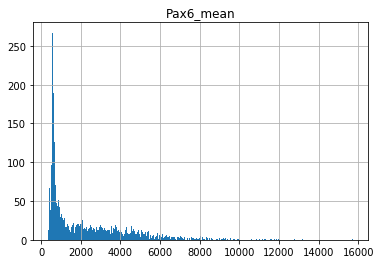

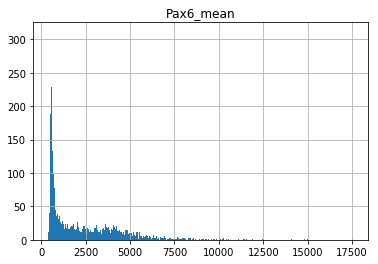

In [9]:
#visualize normalization across slides
roi_df.hist(column='Pax6_mean', bins=1000)
roi_df_new.hist(column='Pax6_mean', bins=1000)

No DAPI found! DAPI normalization did not occur.
Passed  image 
Normalizing   total cell index
Normalizing   ind cell index
Normalizing   Area
Normalizing   Circ.
Normalizing   AR
Normalizing   Round
Normalizing   Solidity
Normalizing   % depth
Normalizing   Tarpg3_mean
Normalizing   Islet1_mean
Normalizing   Pax6_mean
Normalizing   DAPI_mean
Normalizing   CD15_mean
Normalizing   GLT-1_mean
Normalizing   Cav3.1_mean
Normalizing   DAPI2_mean
Normalizing   CABP5_mean
Normalizing   SSCGN_mean
Normalizing   Kv2.2_mean
Normalizing   DAPI3_mean
Normalizing   CAVIII_mean
Normalizing   Rec_mean
Normalizing   DAPI4_mean
Normalizing   Calb_mean
Normalizing   PKC_mean
Normalizing   Parv_mean
Normalizing   DAPI5_mean
Normalizing   Tarpg3_stddev
Normalizing   Islet1_stddev
Normalizing   Pax6_stddev
Normalizing   DAPI_stddev
Normalizing   CD15_stddev
Normalizing   GLT-1_stddev
Normalizing   Cav3.1_stddev
Normalizing   DAPI2_stddev
Normalizing   CABP5_stddev
Normalizing   SCGN_stddev
Normalizing   Kv

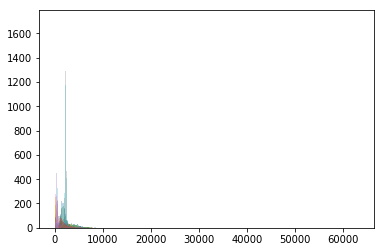

In [10]:
#peforms 99% normalization and zscore normalization. Results saved in "z norm" columns
norm_roi_df = nrm.normalizeProcedure(roi_df_new, quiet=False)

In [11]:
norm_roi_df

,image,total cell index,ind cell index,Area,Circ.,AR,Round,Solidity,% depth,Tarpg3_mean,...,z norm SCGN_median,z norm Kv2.2_median,z norm DAPI3_median,z norm CAVIII_median,z norm Rec_median,z norm DAPI4_median,z norm Calb_median,z norm PKC_median,z norm Parv_median,z norm DAPI5_median
0,21_s1m1,0,0,0.049,0.857,1.450,0.690,0.897,5.259663,367.874005,...,-0.020591,0.302211,-0.746300,-0.565612,1.181044,-1.485921,-1.086136,-0.721506,-0.334144,-1.151339
1,21_s1m1,1,1,0.058,0.878,1.135,0.881,0.892,22.574779,421.173668,...,2.700736,1.379877,0.631802,-0.585292,0.171825,-1.464316,-1.086136,-0.996451,-0.508083,-0.387308
2,21_s1m1,2,2,0.068,0.708,1.663,0.601,0.864,70.322646,525.712353,...,-0.369889,0.786296,2.512683,-0.948704,-1.030963,-1.198727,-0.961293,-0.966496,-0.540182,1.400713
3,21_s1m1,3,3,0.067,0.763,1.336,0.749,0.863,54.642624,454.974859,...,-0.155288,0.734430,1.223703,-0.391122,1.201069,-1.373327,-0.968633,-0.909795,-0.540182,0.586593
4,21_s1m1,4,4,0.099,0.799,1.435,0.697,0.887,17.882495,515.982637,...,-0.280852,0.550017,0.442898,-0.593164,0.370732,-1.464316,-1.053046,-0.811371,-0.431165,-0.597813
5,21_s1m1,5,5,0.060,0.828,1.496,0.669,0.884,43.863270,383.504012,...,-0.294550,0.279159,1.006013,-0.552493,2.354463,-1.394230,-0.913581,-0.748251,-0.512453,0.192214
6,21_s1m1,6,6,0.047,0.785,1.133,0.883,0.854,12.329750,626.757152,...,-0.171269,0.428995,-0.165194,-0.267798,0.967453,-1.455709,-0.619969,0.015605,0.428038,-1.115198
7,21_s1m1,7,7,0.080,0.496,1.602,0.624,0.833,45.541148,468.165002,...,-0.331078,0.279159,1.054588,-0.547245,0.097067,-1.367179,1.325209,-0.399488,0.170190,0.091400
8,21_s1m1,8,8,0.091,0.592,1.395,0.717,0.838,21.534774,453.692188,...,-0.187250,0.244582,-0.039258,-0.991999,0.593668,-1.485921,-0.931932,-0.981474,-0.515075,-0.945906
9,21_s1m1,9,9,0.118,0.588,1.331,0.751,0.794,68.174310,587.855016,...,-0.303682,0.734430,1.851585,-0.695496,-0.856085,-1.192580,-0.961293,-0.970775,-0.540182,0.527626


norm_roi_df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029FBBF07AC8>,
      dtype=object)

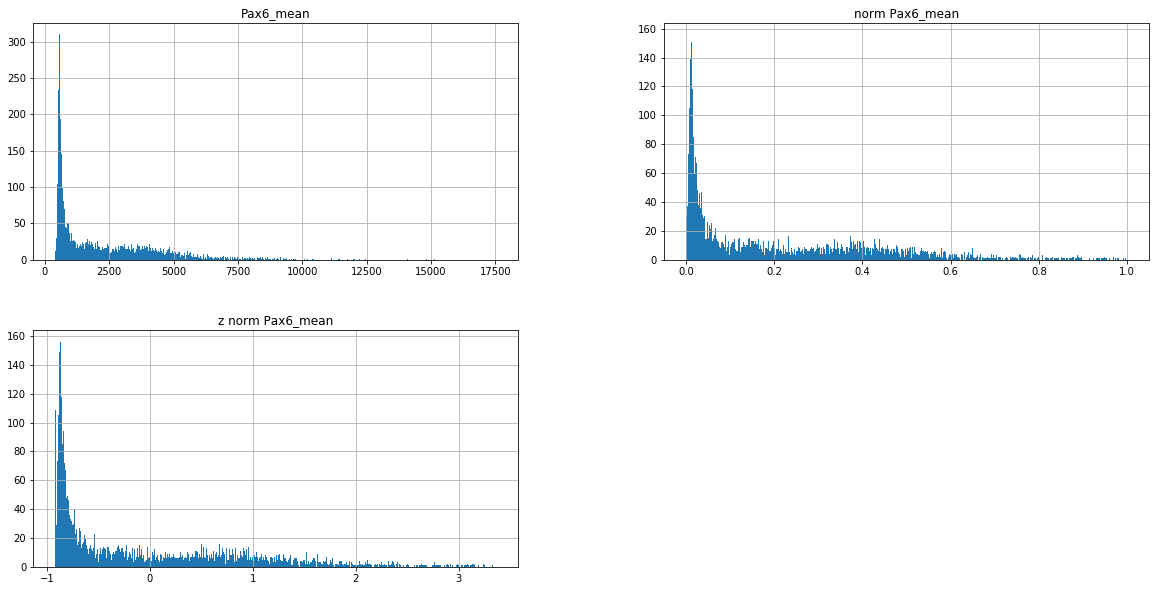

In [12]:
#plots examples of prior, 99%norm and zscore norm histograms for a given channel 
nrm.normHists(norm_roi_df, "Pax6_mean")

#AT THIS POINT ALL NORMALIZATION HAS TAKEN PLACE

In [8]:
def dropper(df, cols):
    '''returns a version with all of the columns that contain col dropped'''
    for col in cols:
        df = df.drop(df.columns[df.columns.str.contains(pat=col)], axis=1)
    return dropper

In [9]:
def zFiveExcluder(df):
    zdrop = dropper(df, ["z norm"])
    fivedrop = dropper(df, ["Area", "Circ.", "Round", "AR", "Solidity"])
    zfivedrop = dropper(fivedrop, ["z norm"])
    return [df, zdrop, fivedrop, zfivedrop]

NameError: name 'norm_roi_df' is not defined

In [14]:
norm_roi_df.to_csv(path_or_buf='C:/Users/mclaughlin.aj/Desktop/quartiles.csv',columns=['image ', 'ind cell index','Pax6_quartiles','Pax6_mean'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [53]:
#CREATE NEW DATAFRAME WHICH ONLY CONTAINS THE NORMALIZED COLUMNS FOR ANALYSIS

roi_cluster_df=norm_roi_df.copy() #creates new df
colNames=roi_cluster_df.columns[roi_cluster_df.columns.str.contains(pat='z norm')]
roi_cluster_df=roi_cluster_df[colNames]
roi_cluster_df=roi_cluster_df.drop(['z norm total cell index', 'z norm ind cell index'], axis=1)

#create variables for channels we don't want to analyze
#a='DAPI'
#b='Tarpg3'
#c='Islet1'
#d='GLT-1'
#e='Cav3.1'
#f='Kv2.2'
##drop all columns with those variable names from the dataframe
#roi_cluster_df=roi_cluster_df.drop(roi_cluster_df.columns[roi_cluster_df.columns.str.contains(pat=a)], axis=1)
#roi_cluster_df=roi_cluster_df.drop(roi_cluster_df.columns[roi_cluster_df.columns.str.contains(pat=b)], axis=1)
##roi_cluster_df=roi_cluster_df.drop(roi_cluster_df.columns[roi_cluster_df.columns.str.contains(pat=c)], axis=1)
#roi_cluster_df=roi_cluster_df.drop(roi_cluster_df.columns[roi_cluster_df.columns.str.contains(pat=d)], axis=1)
#roi_cluster_df=roi_cluster_df.drop(roi_cluster_df.columns[roi_cluster_df.columns.str.contains(pat=e)], axis=1)
#roi_cluster_df=roi_cluster_df.drop(roi_cluster_df.columns[roi_cluster_df.columns.str.contains(pat=f)], axis=1)
##roi_cluster_df=roi_cluster_df.drop(roi_cluster_df.columns[roi_cluster_df.columns.str.contains(pat=a)], axis=1)
##roi_cluster_df=roi_cluster_df.drop(roi_cluster_df.columns[roi_cluster_df.columns.str.contains(pat=a)], axis=1)
noanalysis = ['DAPI', 'Tarpg3', 'Islet1', 'GLT-1', 'Cav3.1', 'Kv2.2']
for col in noanalysis:
    roi_cluster_df=roi_cluster_df.drop(roi_cluster_df.columns[roi_cluster_df.columns.str.contains(pat=col)], axis=1)
roi_cluster_df.head(5)

,z norm Area,z norm Circ.,z norm AR,z norm Round,z norm Solidity,z norm % depth,z norm Islet1_mean,z norm Pax6_mean,z norm CD15_mean,z norm CABP5_mean,...,z norm Islet1_median,z norm Pax6_median,z norm CD15_median,z norm CABP5_median,z norm SCGN_median,z norm CAVIII_median,z norm Rec_median,z norm Calb_median,z norm PKC_median,z norm Parv_median
0,-0.588264,0.624703,-0.178202,-0.000288,0.307175,-1.601558,-1.366725,-0.918895,-1.913062,-0.844291,...,-1.324787,-0.865674,-2.016728,-0.841668,-0.020591,-0.565612,1.181044,-1.086136,-0.721506,-0.334144
1,-0.092524,0.841188,-1.204249,1.487487,0.188008,-0.961800,-1.568243,-0.918895,-1.913062,-1.007763,...,-1.467018,-0.865674,-2.016728,-0.946044,2.700736,-0.585292,0.171825,-1.086136,-0.996451,-0.508083
2,0.458298,-0.911309,0.515602,-0.693545,-0.479328,0.802386,-1.310828,-0.531142,-1.534768,-0.716096,...,-1.176508,-0.479714,-1.636395,-0.668907,-0.369889,-0.948704,-1.030963,-0.961293,-0.966496,-0.540182
3,0.403216,-0.344324,-0.549533,0.459286,-0.503162,0.223041,-1.142732,-0.874030,-1.711355,-0.298764,...,-1.068606,-0.839963,-1.935700,-0.380972,-0.155288,-0.391122,1.201069,-0.968633,-0.909795,-0.540182
4,2.165848,0.026793,-0.227061,0.054238,0.068841,-1.135170,-1.568243,-0.918895,-1.913062,-1.024985,...,-1.467018,-0.865674,-2.016728,-1.003631,-0.280852,-0.593164,0.370732,-1.053046,-0.811371,-0.431165


In [54]:
#look at new dataset
roi_cluster_df.columns.values.tolist()

['z norm Area',
 'z norm Circ.',
 'z norm AR',
 'z norm Round',
 'z norm Solidity',
 'z norm % depth',
 'z norm Islet1_mean',
 'z norm Pax6_mean',
 'z norm CD15_mean',
 'z norm CABP5_mean',
 'z norm SSCGN_mean',
 'z norm CAVIII_mean',
 'z norm Rec_mean',
 'z norm Calb_mean',
 'z norm PKC_mean',
 'z norm Parv_mean',
 'z norm Islet1_stddev',
 'z norm Pax6_stddev',
 'z norm CD15_stddev',
 'z norm CABP5_stddev',
 'z norm SCGN_stddev',
 'z norm CAVIII_stddev',
 'z norm Rec_stddev',
 'z norm Calb_stddev',
 'z norm PKC_stddev',
 'z norm Parv_stddev',
 'z norm Islet1_median',
 'z norm Pax6_median',
 'z norm CD15_median',
 'z norm CABP5_median',
 'z norm SCGN_median',
 'z norm CAVIII_median',
 'z norm Rec_median',
 'z norm Calb_median',
 'z norm PKC_median',
 'z norm Parv_median']

In [87]:
#IMPORTS FOR CLUSTERING

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


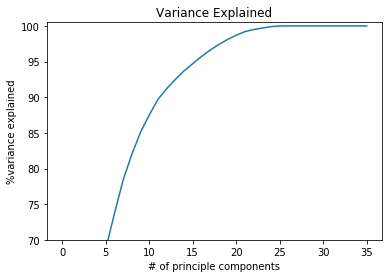

In [57]:
#START CLUSTERING

#calculate variance explained and cumulative variance explained
covar_matrix=PCA(n_components=36)
covar_matrix.fit(roi_cluster_df)
variance=covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

#print graph of the variance explained with [n] features
plt.ylabel('%variance explained')
plt.xlabel('# of principle components')
plt.title('Variance Explained')
plt.ylim(70,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [58]:
#Use PCA BEFORE feeding into tSNE
pca_25=PCA(n_components=25)
pca_result_25=pca_25.fit_transform(roi_cluster_df)
print ('Cumulative explained variance for 25 principal components:{}'.format(np.sum(pca_25.explained_variance_ratio_)))
pca_result_25

Cumulative explained variance for 25 principal components:0.9973642140478106


array([[-1.00012114e+00,  4.63282958e-01, -4.25075768e+00, ...,
         1.60884348e-02, -1.27287514e-01,  1.04035618e-01],
       [-1.31759646e+00, -9.85731371e-01, -4.57429876e+00, ...,
         9.89387371e-02, -1.02721631e-01,  1.07859933e-01],
       [-3.37628165e+00,  5.85080022e-01, -2.91053004e+00, ...,
         1.57005932e-03,  8.05895465e-02, -1.61586779e-01],
       ...,
       [ 2.00154396e+00, -8.23247874e-01, -1.82247641e+00, ...,
        -8.57745385e-02, -9.37770090e-02,  4.28720724e-01],
       [-2.04492491e+00,  1.24538380e+00, -1.04565513e+00, ...,
        -3.91787015e-03,  6.36129474e-02,  1.64316620e-01],
       [ 2.06901190e+00, -9.65320785e-01,  1.17033230e+00, ...,
         1.74454265e-01, -2.64778047e-01,  1.94562675e-01]])

In [77]:
#RUNNING THE TSNE
n_sne = 7973 #with the code below, only runs the tsne on the first [n] number of values 

tsne=TSNE(n_components=2, n_iter=1000, perplexity=40,random_state=123)

#rndperm=np.random.permutation(roi_cluster_df.shape[0])
#time_start=time.time()

#tsne_pca_results=tsne.fit_transform(pca_result_25[rndperm[:n_sne]]) #runs tsne on a subset if n equals something else
tsne_pca_results=tsne.fit_transform(pca_result_25)

print ('tSNE done')
#print ('tSNE done. Time elapsed:{} seconds'.format(time.time()-time_start))       

tSNE done


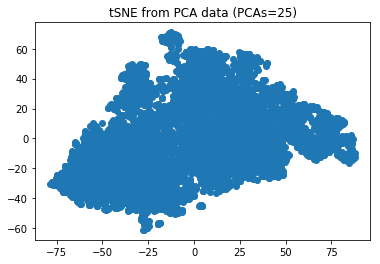

In [78]:
#PLOT tSNE results, using data from PCA 
from ggplot import *
df_tsne = None
df_tsne = roi_cluster_df.loc[rndperm[:n_sne],:].copy()

df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]

chart = ggplot(df_tsne, aes(x='x-tsne-pca', y='y-tsne-pca') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE from PCA data (PCAs=25)")
chart

#regular plot of tsne
plt.title('tSNE from PCA data (PCAs=25)')
plt.scatter(tsne_pca_results[:,0], tsne_pca_results[:,1])

[4 5 1 ... 4 0 3]


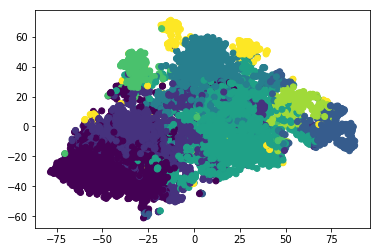

In [85]:
#RUN KMEANS ON PCA DATA

pca_result_25_df=pd.DataFrame(pca_result_25)

kmeans = KMeans(n_clusters=8, random_state = 123)
kmeans.fit(pca_result_25)
print(kmeans.labels_)
plt.scatter(tsne_pca_results[:,0], tsne_pca_results[:,1], c=kmeans.labels_)

In [98]:
#export Kmeans cluster assignments

#Gathering all of the data into CSV files, where each image dataset has a CSV for its k-Means labels and its GaussianMixture labels

updated_data = roi_df[["image "]]
from math import *

newest_data = updated_data.iloc[0:10672,].values
curr_pic = '[21_s1m1]'
curr_kmeans_array = []
curr_mixture_array = []

for i in range(0, pca_result_25.shape[0]):
    if newest_data[i] == '21_s1m1':
        curr_kmeans_array.append(kmeans.labels_[i])
        curr_mixture_array.append(gmm_labels[i])
    elif not pd.isnull(newest_data[i]):
        kmeans_csv = pd.DataFrame(np.array(curr_kmeans_array).reshape(len(curr_kmeans_array), 1), columns = ['Kmeans labels'])
        mixture_csv = pd.DataFrame(np.array(curr_mixture_array).reshape(len(curr_mixture_array), 1), columns = ['Mixture labels'])
        kmeans_file_name = str(curr_pic) + '_kmeans_labels.csv'
        mixture_file_name = str(curr_pic) + '_mixture_labels.csv'
        kmeans_csv.to_csv(kmeans_file_name)
        mixture_csv.to_csv(mixture_file_name)
        curr_pic = newest_data[i]
        curr_kmeans_array = []
        curr_mixture_array = []
    else:
        curr_kmeans_array.append(kmeans.labels_[i])
        curr_mixture_array.append(labels[i])


PermissionError: [Errno 13] Permission denied: "['23_s2m2']_mixture_labels.csv"

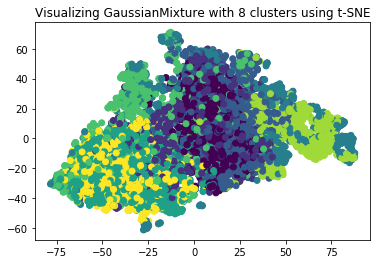

In [92]:
#Running GaussianMixture on PCA data

gmm = GaussianMixture(n_components=8).fit(pca_result_25)
gmm_labels = gmm.predict(pca_result_25)
#my_dictionary = {}
tsne = TSNE(n_components = 2, n_iter = 1000, perplexity = 30, random_state = 123)
tsne_run = tsne.fit_transform(pca_result_25)

#Visualizing GaussianMixture with 8 clusters using t-SNE

plt.scatter(tsne_pca_results[:,0], tsne_pca_results[:,1], c=gmm_labels)



#for i in range(0, pca_result_25.shape[0]):
#    holder = labels[i]
#    curr_value = "c" + str(holder + 1)
#   my_dictionary[curr_value] = plt.scatter(tsne_run[i,0],tsne_run[i,1],c=labels)

#plt.legend([my_dictionary["c1"], my_dictionary["c2"], my_dictionary["c3"], my_dictionary["c4"], my_dictionary["c5"], my_dictionary["c6"], my_dictionary["c7"], my_dictionary["c8"]],['Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8'])
plt.title('Visualizing GaussianMixture with 8 clusters using t-SNE')
plt.show()

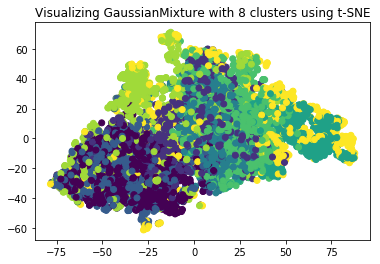

In [93]:
#Running GaussianMixture on raw data

gmm = GaussianMixture(n_components=8).fit(roi_cluster_df)
gmm_labels_raw = gmm.predict(roi_cluster_df)
#my_dictionary = {}
tsne = TSNE(n_components = 2, n_iter = 1000, perplexity = 30, random_state = 123)
tsne_run = tsne.fit_transform(roi_cluster_df)

#Visualizing GaussianMixture with 8 clusters using t-SNE

plt.scatter(tsne_pca_results[:,0], tsne_pca_results[:,1], c=gmm_labels_raw)
plt.title('Visualizing GaussianMixture with 8 clusters using t-SNE')
plt.show()